## Interview for buzzer.ai 
Candidate: Shira Wild

## Installations and Imports
 

In [1]:
#Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import missingno as msno
from sklearn.preprocessing import StandardScaler
import numpy as np 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import warnings
 


In [2]:
#Read the data
data = pd.read_csv("Marketing_Leads_India.csv")

In [3]:
# Split to train and test data
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

### Train Data

First, let's take a look at our data:

In [4]:
train_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
6487,600123,Landing Page Submission,Organic Search,Yes,No,0,2.0,239,2.0,SMS Sent,...,No,NaN,Thane & Outskirts,NaN,NaN,NaN,NaN,No,No,SMS Sent
4759,614204,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,...,No,NaN,NaN,NaN,NaN,NaN,NaN,No,No,Modified
4368,617857,API,Google,No,No,0,3.0,396,3.0,Email Opened,...,No,Student of SomeSchool,NaN,NaN,NaN,NaN,NaN,No,No,Email Opened
1467,644758,Landing Page Submission,Google,No,No,1,4.0,894,4.0,SMS Sent,...,No,NaN,Thane & Outskirts,02.Medium,02.Medium,15.0,14.0,No,No,SMS Sent
5517,607605,Landing Page Submission,Direct Traffic,No,No,0,2.0,143,2.0,Converted to Lead,...,No,NaN,Tier II Cities,NaN,NaN,NaN,NaN,No,Yes,Modified


In [5]:
train_data.shape

(7392, 36)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7392 entries, 6487 to 7270
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    7392 non-null   int64  
 1   Lead Origin                                    7392 non-null   object 
 2   Lead Source                                    7363 non-null   object 
 3   Do Not Email                                   7392 non-null   object 
 4   Do Not Call                                    7392 non-null   object 
 5   Converted                                      7392 non-null   int64  
 6   TotalVisits                                    7290 non-null   float64
 7   Total Time Spent on Website                    7392 non-null   int64  
 8   Page Views Per Visit                           7290 non-null   float64
 9   Last Activity                                  73

We will check if the class labels of the data are balanced 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


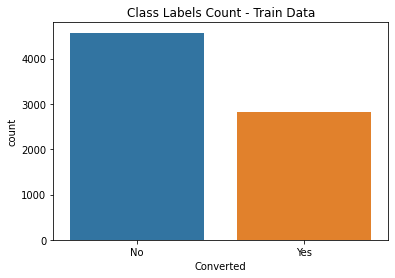

In [7]:
# plot the class values
g = sns.countplot(train_data['Converted'])
g.set_xticklabels(['No', 'Yes'])
plt.title('Class Labels Count - Train Data')
plt.show()

As we can see, the class labels count are pretty balanced. 

### Test data

In [8]:
test_data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
4608,615582,Landing Page Submission,Google,No,No,1,8.0,252,2.67,Email Opened,...,No,NaN,Mumbai,NaN,NaN,NaN,NaN,No,Yes,Email Opened
7935,588939,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,929,2.00,Email Bounced,...,No,NaN,Other Cities,02.Medium,02.Medium,14.0,16.0,No,Yes,Modified
4043,621242,Landing Page Submission,Direct Traffic,Yes,No,0,1.0,2,1.00,Email Bounced,...,No,NaN,Other Cities,NaN,NaN,NaN,NaN,No,No,Modified
7821,589803,Landing Page Submission,Direct Traffic,No,No,0,2.0,323,2.00,Email Opened,...,No,NaN,Mumbai,02.Medium,01.High,14.0,18.0,No,No,Email Opened
856,651441,Landing Page Submission,Google,No,No,0,3.0,201,3.00,Email Opened,...,No,NaN,Mumbai,02.Medium,01.High,13.0,18.0,No,No,Email Opened


In [9]:
test_data.shape

(1848, 36)

In [10]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1848 entries, 4608 to 7352
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    1848 non-null   int64  
 1   Lead Origin                                    1848 non-null   object 
 2   Lead Source                                    1841 non-null   object 
 3   Do Not Email                                   1848 non-null   object 
 4   Do Not Call                                    1848 non-null   object 
 5   Converted                                      1848 non-null   int64  
 6   TotalVisits                                    1813 non-null   float64
 7   Total Time Spent on Website                    1848 non-null   int64  
 8   Page Views Per Visit                           1813 non-null   float64
 9   Last Activity                                  18

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


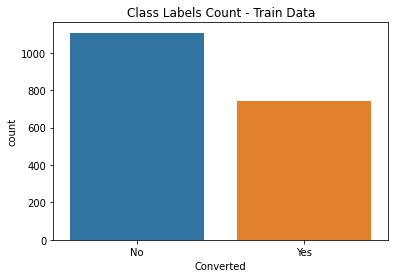

In [11]:
# plot the class values
g = sns.countplot(test_data['Converted'])
g.set_xticklabels(['No', 'Yes'])
plt.title('Class Labels Count - Train Data')
plt.show()

As we can see, the values of the class labels are quite balanced. Therefore, we can evaluate it using common metrics for binary classification tasks, for example accuracy. 

## Data Preprocessing 

In [12]:
def num_of_dup_rows(data, data_name):
  num_duplicated_rows = data.duplicated().sum()
  perc_duplicated_rows = (num_duplicated_rows/len(data))*100
  print('Percentage of duplicated rows for', data_name, "is", perc_duplicated_rows, '%')

In [13]:
num_of_dup_rows(train_data, 'train data')

Percentage of duplicated rows for train data is 0.0 %


In [14]:
num_of_dup_rows(test_data, 'test_data')

Percentage of duplicated rows for test_data is 0.0 %


As we can see, there are no duplicate rows in our data.

We will remove rows from the training data which their percentage of missing values is higher than 50%:

In [15]:
perc = 50.0
min_count =  int(((100-perc)/100)*train_data.shape[1] + 1)
train_data = train_data.dropna( axis=0, thresh=min_count)


Now we will visualize the missing values according to the different features

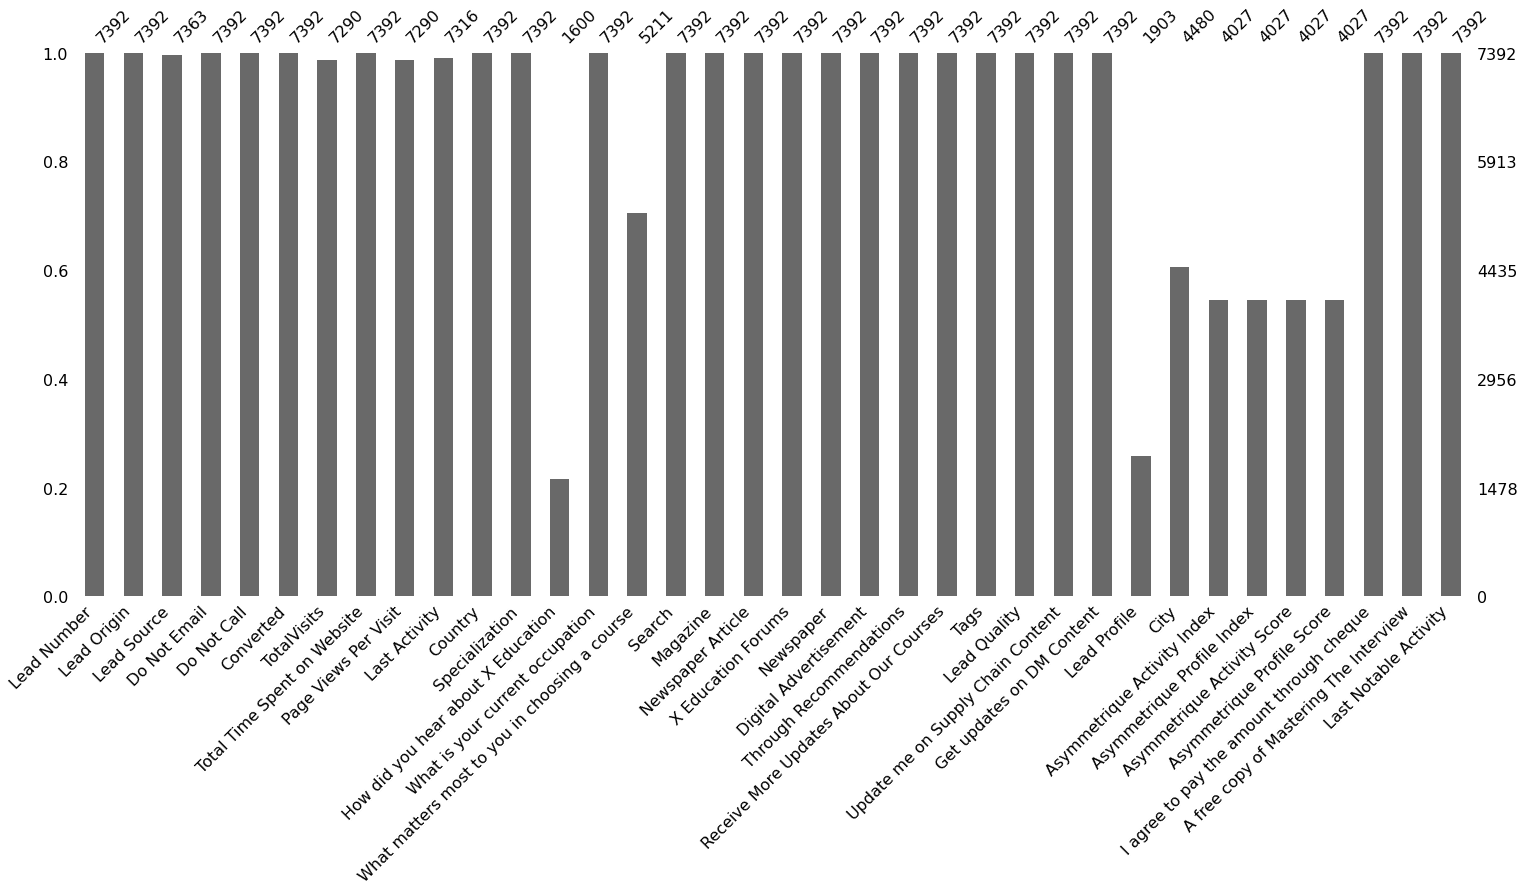

In [16]:
# Visualize the number of missing values as a bar chart
msno.bar(train_data);

In [17]:
#Detect missing values
train_data.isna().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        29
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       102
Total Time Spent on Website                         0
Page Views Per Visit                              102
Last Activity                                      76
Country                                             0
Specialization                                      0
How did you hear about X Education               5792
What is your current occupation                     0
What matters most to you in choosing a course    2181
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

We will delete columns which have more than 50% missing values, since it is not informative enough. As such, we will drop these features from both the train data and test data

In [18]:
origin_columns = train_data.columns
perc = 50.0
min_count =  int(((100-perc)/100)*train_data.shape[0] + 1)
train_data = train_data.dropna( axis=1, thresh=min_count)
deleted_columns = [col for col in origin_columns if col not in train_data.columns]
test_data = test_data.drop(columns=deleted_columns)

In [19]:
deleted_columns

['How did you hear about X Education', 'Lead Profile']

Next, we will fill the NaN values in the following way:


*   Numeric columns - NaN values will be replaced with the average value of its corresponding column
*   Category columns - NaN values will be replaced with the most frequent value of its corresponding column 

We will fill the missing values in the test data according to the values identified in the train data, since it is an external dataset which we don't always have access to

In [20]:
# Complete missing values based on the train data 
def fill_missing_values(data, train_data):
  for col in data.columns:
    if data[col].dtype == float or data[col].dtype == int: # numeric attributes
          data[col].fillna(train_data[col].mean(), inplace=True)
    else: ## category attibutes
          data[col].fillna(train_data[col].mode()[0], inplace=True)

  return data


train_data = fill_missing_values(train_data, train_data) 
train_data

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
6487,600123,Landing Page Submission,Organic Search,Yes,No,0,2.0,239,2.0,SMS Sent,...,No,No,Thane & Outskirts,02.Medium,02.Medium,14.307177,16.35262,No,No,SMS Sent
4759,614204,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,...,No,No,Mumbai,02.Medium,02.Medium,14.307177,16.35262,No,No,Modified
4368,617857,API,Google,No,No,0,3.0,396,3.0,Email Opened,...,No,No,Mumbai,02.Medium,02.Medium,14.307177,16.35262,No,No,Email Opened
1467,644758,Landing Page Submission,Google,No,No,1,4.0,894,4.0,SMS Sent,...,No,No,Thane & Outskirts,02.Medium,02.Medium,15.000000,14.00000,No,No,SMS Sent
5517,607605,Landing Page Submission,Direct Traffic,No,No,0,2.0,143,2.0,Converted to Lead,...,No,No,Tier II Cities,02.Medium,02.Medium,14.307177,16.35262,No,Yes,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,605829,Landing Page Submission,Google,No,No,0,3.0,130,3.0,Email Opened,...,No,No,Mumbai,02.Medium,02.Medium,14.307177,16.35262,No,No,Email Opened
5191,610099,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,...,No,No,Mumbai,02.Medium,02.Medium,14.307177,16.35262,No,No,Modified
5390,608489,Lead Add Form,Reference,No,No,1,0.0,0,0.0,SMS Sent,...,No,No,Thane & Outskirts,02.Medium,02.Medium,14.307177,16.35262,No,No,SMS Sent
860,651374,Landing Page Submission,Google,No,No,0,3.0,179,3.0,Email Opened,...,No,No,Other Cities,03.Low,02.Medium,12.000000,16.00000,No,No,Email Opened


In [21]:
test_data = fill_missing_values(test_data, train_data) # the second parameter specifies that common/mean values will be determined according to the train set.
test_data

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
4608,615582,Landing Page Submission,Google,No,No,1,8.000000,252,2.670000,Email Opened,...,No,No,Mumbai,02.Medium,02.Medium,14.307177,16.35262,No,Yes,Email Opened
7935,588939,Landing Page Submission,Direct Traffic,Yes,No,0,2.000000,929,2.000000,Email Bounced,...,No,No,Other Cities,02.Medium,02.Medium,14.000000,16.00000,No,Yes,Modified
4043,621242,Landing Page Submission,Direct Traffic,Yes,No,0,1.000000,2,1.000000,Email Bounced,...,No,No,Other Cities,02.Medium,02.Medium,14.307177,16.35262,No,No,Modified
7821,589803,Landing Page Submission,Direct Traffic,No,No,0,2.000000,323,2.000000,Email Opened,...,No,No,Mumbai,02.Medium,01.High,14.000000,18.00000,No,No,Email Opened
856,651441,Landing Page Submission,Google,No,No,0,3.000000,201,3.000000,Email Opened,...,No,No,Mumbai,02.Medium,01.High,13.000000,18.00000,No,No,Email Opened
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7387,592785,Landing Page Submission,Direct Traffic,No,No,1,3.000000,1486,3.000000,Email Opened,...,No,No,Thane & Outskirts,02.Medium,01.High,14.000000,17.00000,No,Yes,Email Opened
3063,630603,API,Google,No,No,1,8.000000,1054,2.670000,Email Opened,...,No,No,Other Cities of Maharashtra,02.Medium,02.Medium,14.307177,16.35262,No,No,Modified
603,654192,Lead Import,Facebook,No,No,0,3.481893,97,2.377359,Email Opened,...,No,No,Mumbai,02.Medium,02.Medium,13.000000,15.00000,No,No,Modified
4210,619497,Landing Page Submission,Google,No,No,1,4.000000,409,4.000000,Email Opened,...,No,No,Mumbai,02.Medium,02.Medium,14.307177,16.35262,No,No,Email Opened


### Transformation

First, we will transform and normalize the values of numeric features, to minimize redundancy  and  avoid  unnecessary  anomalies  properties.

We will use sklearn's StandardScaler, which implements an incremental algorithm for computing mean and standard deviation (see https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

The data calculated for the normalization is done based on the train set. The same scaler will be used to normalize the test set afterwards. 

For the training phase, each fold will have its own std and mean calculated and applied.


In [22]:
test_lead_number = test_data['Lead Number']

We will drop 'Lead Number' column since it has no additional contribution to the model 

In [23]:
train_data = train_data.drop(['Lead Number'], axis = 1)
test_data = test_data.drop(['Lead Number'], axis = 1)

In [24]:
numeric_cols = [col for col in train_data.columns if train_data[col].dtype == float or train_data[col].dtype== int]
cat_cols = [col for col in train_data.columns if col not in numeric_cols]
numeric_cols.remove('Converted')


In [25]:
# only numeric features
def normalize_features(data, scaler, cols):
    # normalize
    data[cols] = scaler.transform(data[cols])  
    return data

In [26]:
# save the mean and std of the whole train, to normalize test set afterwards
train_std_scale = StandardScaler()
train_std_scale.fit(train_data[numeric_cols])

StandardScaler()

In [27]:
# normalize the test and train data, based on the std and mean of the train data
test_data = normalize_features(test_data, train_std_scale, numeric_cols)
train_data = normalize_features(train_data, train_std_scale, numeric_cols)


Next, we will encode any category feature, since the selected ML models work on numeric features. We will treat nominal and ordinal differently, as described:
1. For nominal variables: we will use OneHotEncoder - In this technique, first of all, for each distinct value of the feature, new columns are created. Then in these new columns, the absence of that value in the row is denoted by 1, and absence is denoted by 0.

2. For ordinal variables: we will use LabelEncoder -In label encoding, each distinct value of the feature is assigned numeric values starting from 0 to N-1 where N is the total number of distinct values. 


In [28]:
ordinal_cat = ['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index']
nominal_cat = [cat for cat in cat_cols if cat not in ordinal_cat]

In [29]:
# For ordinal features
le = preprocessing.LabelEncoder()
train_data[ordinal_cat] = train_data[ordinal_cat].apply(le.fit_transform)
test_data[ordinal_cat] = test_data[ordinal_cat].apply(le.fit_transform)




In [30]:
# For nominal features - train data
encoder = OneHotEncoder(handle_unknown='ignore')
fitted_encoder = encoder.fit(train_data[nominal_cat])
encodertrain_df = pd.DataFrame(fitted_encoder.transform(train_data[nominal_cat]).toarray())
encodertrain_df.columns = encoder.get_feature_names(nominal_cat)
train_data = train_data.join(encodertrain_df)
train_data = train_data.drop(nominal_cat, axis = 1)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


We will use the encoder of the train data for the test data, in order to receive the same amount of columns.  

In [31]:
# For nominal features - test data

encodertest_df = pd.DataFrame(fitted_encoder.transform(test_data[nominal_cat]).toarray())
encodertest_df.columns = encoder.get_feature_names_out(nominal_cat)
test_data = test_data.join(encodertest_df)
test_data = test_data.drop(nominal_cat, axis = 1)



In [32]:
test_data = test_data.fillna(0)
train_data = train_data.fillna(0)

### Feature Selections

We will  examine the correlations between the initial numeric features:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  This is separate from the ipykernel package so we can avoid doing imports until


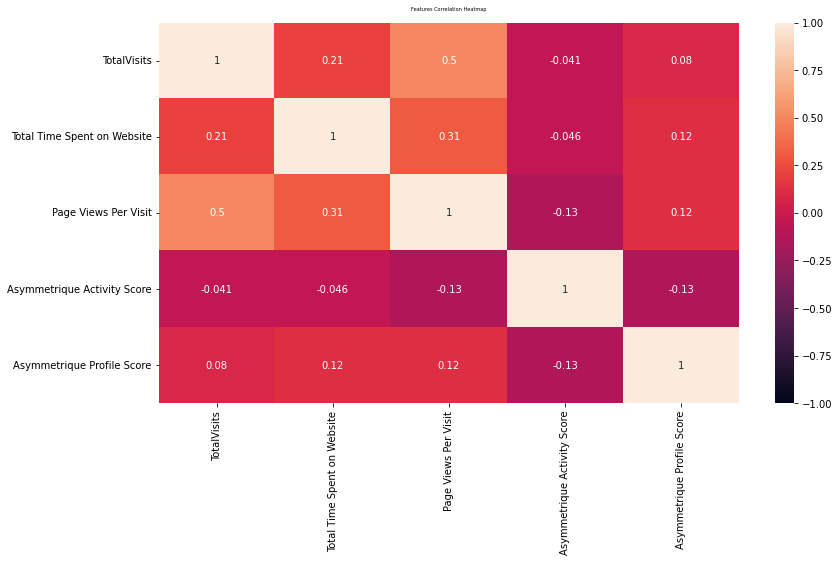

In [33]:
plt.figure(figsize=(13, 7))

numeric_features = train_data[train_data.columns & numeric_cols]
heatmap = sns.heatmap(numeric_features.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Features Correlation Heatmap', fontdict={'fontsize':5}, pad=12);

In [34]:
train_data[train_data.columns & numeric_cols].corr()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  """Entry point for launching an IPython kernel.


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
TotalVisits,1.000000,0.213276,0.500863,-0.041259,0.079921
Total Time Spent on Website,0.213276,1.000000,0.308859,-0.046450,0.123238
Page Views Per Visit,0.500863,0.308859,1.000000,-0.126385,0.117530
Asymmetrique Activity Score,-0.041259,-0.046450,-0.126385,1.000000,-0.130093
Asymmetrique Profile Score,0.079921,0.123238,0.117530,-0.130093,1.000000


As we can see,  there are not any features pair which is highly correlated. If there were any, we could have performed feature selection based on correlations (drop one of two correlated pair), since two features that are highly correlated are not very informative.

In [35]:
# Split into X_train and y_train 

X_train = train_data.drop(['Converted'],axis=1)
y_train = train_data['Converted']


Since the data have many features, we will use Feature Selection method which uses Random Forest. the random forest model, while trained, gives "feature importance" scores for the different features. The "SelectFromModel" method selects the features which their importance is greater than the treshold - which is the median of the feature importances. 

In [36]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [37]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False,  True, False,  True, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [38]:
#Count the selected features
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)


28

In [39]:
# The names of the selected features 
print(selected_feat)

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Quality', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Last Activity_Email Opened',
       'Last Activity_SMS Sent', 'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management', 'Specialization_Others',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'City_Mumbai', 'A free copy of Mastering The Interview_No',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [40]:
removed_cols = [col for col in train_data if col not in selected_feat]
removed_cols.remove('Converted')

In [41]:
train_data = train_data.drop(removed_cols, axis =1)
test_data = test_data.drop(removed_cols, axis =1 )

In [42]:
train_data

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Quality,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Origin_API,...,Specialization_Marketing Management,Specialization_Others,Tags_Ringing,Tags_Will revert after reading the email,City_Mumbai,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_SMS Sent
6487,0,-0.300106,-0.454165,-0.173856,3,1,1,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4759,0,-0.705136,-0.889097,-1.095291,3,1,1,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4368,0,-0.097591,-0.168456,0.286861,4,1,1,0.000000,0.000000,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
1467,1,0.104925,0.737805,0.747579,2,1,1,0.679045,-1.747138,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
5517,0,-0.300106,-0.628866,-0.173856,3,1,1,0.000000,0.000000,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0,-0.097591,-0.652523,0.286861,3,1,1,0.000000,0.000000,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
5191,0,-0.705136,-0.889097,-1.095291,3,1,1,0.000000,0.000000,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
5390,1,-0.705136,-0.889097,-1.095291,0,1,1,0.000000,0.000000,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
860,0,-0.097591,-0.563353,0.286861,2,2,1,-2.261293,-0.261868,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


## Models 

In [43]:
X_train = train_data.drop(['Converted'],axis=1)
y_train = train_data['Converted']

X_test = test_data.drop(['Converted'],axis=1)
y_test = test_data['Converted']
 

In [44]:
warnings.filterwarnings('ignore')

pipe = Pipeline([('scaler', StandardScaler()), ('estimator', xgb.XGBClassifier())]) # we will perform scaling for each fold separately.

# Add a dict of estimator and estimator related parameters in this list
params_grid = [
               {
                'estimator':[SVC()],
                'estimator__C': [1, 10,20],
                'estimator__gamma': [0.001, 0.1],
                'estimator__class_weight': [None, 'balanced'],
                },
                {
                'estimator': [DecisionTreeClassifier()],
                'estimator__max_depth': [1,2,5, 20],
                }, 
                {
                'estimator' : [RandomForestClassifier()],
                'estimator__n_estimators': [1,2,5,20],
                'estimator__max_depth': [5,8,10],
                'estimator__min_samples_split': [2, 5, 10, 15],
                'estimator__min_samples_leaf': [1, 2, 5, 10] 
                },
                {
                'estimator' : [xgb.XGBClassifier()],
                'estimator__pca__n_components': [5, 10, 15],
                'estimator__model__max_depth': [3, 5, 10],
                'estimator__model__n_estimators': [2,5,10],
                },
                {
                'estimator' : [LogisticRegression()],
                'estimator__penalty': ['l1', 'l2'],
                'estimator__C': [0.001,0.01,1],
                },
              ]

grid = GridSearchCV(pipe, params_grid, cv = 5, scoring='roc_auc', verbose=10, n_jobs = -1)

grid.fit(X_train, y_train)

best_model = grid.best_estimator_   

Fitting 5 folds for each of 241 candidates, totalling 1205 fits


The best model chosen according to auc score, with the best parameters of the tuning:

In [45]:
best_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('estimator',
                 XGBClassifier(model__max_depth=3, model__n_estimators=2,
                               pca__n_components=5))])

## Evaluation Phase


Since the class values distribution is balanced, we can use Accuracy measure. Therefore, we will examine the following metrics:
1. AUC
2. F-score
3. Accuracy
4. Recall
5. Precision

In [46]:
predictions = best_model.predict(X_test)

In [47]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, predictions, average=None)
print('AUC score for the test set is:', auc )

AUC score for the test set is: 0.8081147208233216


In [48]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

f_score = f1_score(y_test, predictions, average='weighted')
print('F-Score for the test set is:', f_score )

F-Score for the test set is: 0.8201780712284913


In [49]:
recall = recall_score(y_test, predictions)
print('Recall for the test set is:', recall )

Recall for the test set is: 0.7408906882591093


In [50]:
precision = precision_score(y_test, predictions)
print('Precision for the test set is:', precision )

Precision for the test set is: 0.7991266375545851


We can see that the scores in the different matrices are pretty similar, and the score with the highest value is F1-Score. 


## Benchmark of the results 

In [51]:
prob_predictions = best_model.predict_proba(X_test)
scores_preds = [prob[1]*100 for prob in prob_predictions]


In [56]:
d = {'LeadNumber': list(test_lead_number), 'Score': sorted(scores_preds, reverse = True)}

The benchmark contain a score for each Lead Number, each score is between 0 to 100 and is computated by multiplying the probability received by the model by 100. By looking at the benchmark, we can identify the leads with the highest probability to be converted. 

In [57]:
benchmark = pd.DataFrame(data=d)
benchmark

,LeadNumber,Score
0,615582,99.023294
1,588939,99.016726
2,621242,98.961943
3,589803,98.953664
4,651441,98.899114
...,...,...
1843,592785,0.627542
1844,630603,0.602655
1845,654192,0.569277
1846,619497,0.547808


In [59]:
benchmark.to_csv('leads_predictions.csv') 